In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sn

### Rationale
Metamemory, however defined, is the capacity to monitor. Whatver and however monitoring occurs, the 'what' is monitored can be classifeid as information. 

All probability distributions which have a mean, variance etc, also have an entropy metric. See Wikipedia for examples. 

When one considers what has to be monitored, alongisde a primacy/recency distribution, there are what seem like natural links. 

1. This effect when plotted resembles a discrete beta distribution. The $\alpha$ and $\beta$ values represent probability of success and failure, respectively. 
2. The unifrom distribution represents equal recall across trials, items etc. 
3. The question then is whether the information value of a distribution with primacy and recency effects differs and, most important, whether the information value is less for a beta-type distribution. If this premise is true, then monitoring demands for these naturally occurring distributions are lower, with implications for memory functioning being driven by information load. 

Shannon [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory) is simply a measure of uncertainty or surprise. Bigger number, more [uncertainty](https://math.stackexchange.com/questions/331103/intuitive-explanation-of-entropy). The number is bigger as a function of the sum of inverse probabilities. Less probable is more surprising. 

Now first create a primacy recency distribution and use a simple (scipy) function to calculate the entropy. Then we compare it with a standard uniform distribution. Which has more entropy and why? 

In [13]:
#not even going to use a function to generate these. 
recall_Distribution = np.array([75,60,42,32,20,10,18,40,50,70])
total = np.sum(recall_Distribution)
length = len(recall_Distribution)
#Normalise distributions to become probabilities. 
uniform_Distribution = np.repeat(np.mean(recall_Distribution),
                                 length)/total
recall_Distribution =  (recall_Distribution/np.sum(recall_Distribution))

recall_Distribution, uniform_Distribution

(array([0.17985612, 0.14388489, 0.10071942, 0.07673861, 0.04796163,
        0.02398082, 0.04316547, 0.09592326, 0.11990408, 0.16786571]),
 array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))

In [14]:
x_Value = np.linspace(1,length, length, dtype=int)
x_Value

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

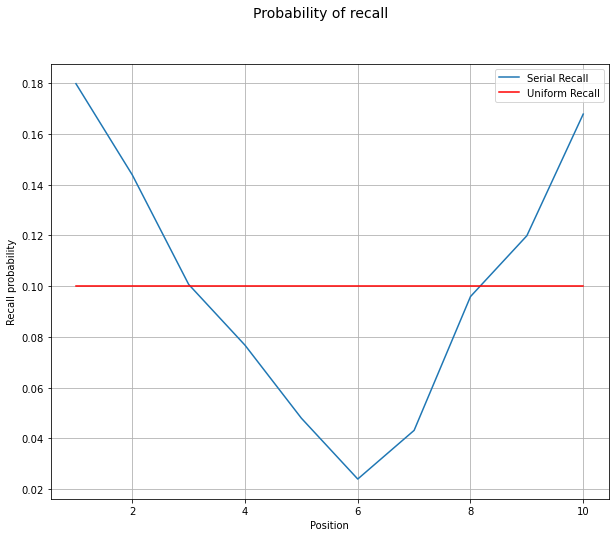

In [15]:
fig, (ax0) = plt.subplots(nrows=1,ncols=1, sharex = True, figsize=(10,8))
fig.suptitle("Probability of recall", fontsize=14)

# Velocity magnitude graph
ax0.set_xlabel('Position')
ax0.set_ylabel('Recall probability')
ax0.plot(x_Value, recall_Distribution, label="Serial Recall")
ax0.plot(x_Value, uniform_Distribution, label="Uniform Recall", color='red')
ax0.legend()
ax0.grid(True)

# # x-Velocity graph
# ax1.set_ylabel('x-velocity (mm/s)')
# ax1.plot(df["time"], df["vel_x"], label="x-velocity", color='blue')
# ax1.legend()
# ax1.grid(True)


Now let us calcuate the entropy for each distribution. It is worth doing manually but the scipy entropy function does the same thing. 

In [16]:
serialRecallEntropy = sp.stats.entropy(recall_Distribution, base=2)
print(f'The entropy for serial recall, with primacy and recency effects, is {serialRecallEntropy.round(3)}.')

The entropy for serial recall, with primacy and recency effects, is 3.124.


In [17]:
uniformRecallEntropy = sp.stats.entropy(uniform_Distribution,base=2)
print(f'The entropy for uniform recall, with no primacy and recency effects, is {uniformRecallEntropy.round(3)}.')

The entropy for uniform recall, with no primacy and recency effects, is 3.322.


Uniform recall has higher entropy, is more surprising than a beta distributed recall. This supports a position that memory recall veers towards a lower entropy protocol. That is consistent with most models of information transmission, and indeed is the basis of compression algorithms. 